In [130]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
from pathlib import Path
%matplotlib inline

In [131]:
# Import stock prices with alpaca (maybe focus on adj close instead of close)

In [132]:
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

MSFT_open  MSFT_high  MSFT_low  MSFT_close  AMD_open  AMD_high  \
2010-06-29      24.13      24.20    23.110       23.31      7.93      7.93   
2010-06-30      23.30      23.68    22.950       23.01      7.58      7.65   
2010-07-01      23.09      23.32    22.730       23.16      7.35      7.53   
2010-07-02      23.36      23.48    23.050       23.27      7.45      7.48   
2010-07-06      23.70      24.09    23.584       23.82      7.40      7.42   

            AMD_low  AMD_close  TSLA_open  TSLA_high  ...  JNJ_low  JNJ_close  \
2010-06-29     7.41       7.48      19.00    25.0000  ...   58.680      59.24   
2010-06-30     7.30       7.32      25.79    30.4192  ...   58.940      59.06   
2010-07-01     7.10       7.39      25.00    25.9200  ...   58.650      59.07   
2010-07-02     7.02       7.17      23.00    23.1000  ...   58.850      59.08   
2010-07-06     6.96       7.04      20.00    20.0000  ...   58.669      59.08   

            REGN_open  REGN_high  REGN_low  REGN_close  GILD_open  GILD_high  \
2010-06-29      23.67      23.95     22.86       22.98      35.40      35.61   
2010-06-30      23.05      23.47     22.32       22.32      34.83      35.13   
2010-07-01      22.31      22.37     20.45       20.79      34.24      34.27   
2010-07-02      21.06      21.88     20.75       21.61      34.38      35.16   
2010-07-06      22.03      22.03     21.16       21.36      35.11      35.42   

            GILD_low  GILD_close  
2010-06-29    34.740       34.97  
2010-06-30    34.260       34.28  
2010-07-01    33.300       34.14  
2010-07-02    34.180       34.87  
2010-07-06    34.415       34.77  

[5 rows x 24 columns]

In [133]:
df_MSFT = df[['MSFT_close']].copy()

In [134]:
# A variable for predicting 'n' days out into the future
forecast_out = 5
#Create another column (the target ) shifted 'n' units up
df_MSFT['Prediction'] = df_MSFT[['MSFT_close']].shift(-forecast_out)

In [135]:
df_MSFT.tail()

MSFT_close  Prediction
2020-06-30      203.51         NaN
2020-07-01      204.70         NaN
2020-07-02      206.26         NaN
2020-07-06      210.70         NaN
2020-07-07      208.25         NaN

In [136]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df_MSFT.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 23.31]
 [ 23.01]
 [ 23.16]
 ...
 [200.34]
 [196.33]
 [198.44]]


In [137]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df_MSFT['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 24.3     24.4095  24.27   ... 206.26   210.7    208.25  ]


In [138]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
# Create and train the Linear Regression  Model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
model_confidence = model.score(x_test, y_test)
print("model confidence: ", model_confidence)

model confidence:  0.996549722053352


In [141]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df_MSFT.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[203.51],
       [204.7 ],
       [206.26],
       [210.7 ],
       [208.25]])

In [142]:
predictions = model.predict(x_forecast)
predictions

array([205.00622957, 206.20595362, 207.77870112, 212.25498245,
       209.78496234])

In [143]:
df_MSFT.tail(40)

MSFT_close  Prediction
2020-05-11      186.74      184.91
2020-05-12      182.51      183.63
2020-05-13      179.75      185.66
2020-05-14      180.53      183.43
2020-05-15      183.16      183.51
2020-05-18      184.91      181.57
2020-05-19      183.63      181.81
2020-05-20      185.66      181.40
2020-05-21      183.43      183.25
2020-05-22      183.51      182.83
2020-05-26      181.57      184.91
2020-05-27      181.81      185.36
2020-05-28      181.40      182.92
2020-05-29      183.25      187.20
2020-06-01      182.83      188.36
2020-06-02      184.91      189.80
2020-06-03      185.36      196.84
2020-06-04      182.92      186.27
2020-06-05      187.20      187.74
2020-06-08      188.36      188.94
2020-06-09      189.80      193.57
2020-06-10      196.84      194.24
2020-06-11      186.27      196.32
2020-06-12      187.74      195.15
2020-06-15      188.94      200.57
2020-06-16      193.57      201.91
2020-06-17      194.24      197.84
2020-06-18      196.32      200.34
2020-06-19      195.15      196.33
2020-06-22      200.57      198.44
2020-06-23      201.91      203.51
2020-06-24      197.84      204.70
2020-06-25      200.34      206.26
2020-06-26      196.33      210.70
2020-06-29      198.44      208.25
2020-06-30      203.51         NaN
2020-07-01      204.70         NaN
2020-07-02      206.26         NaN
2020-07-06      210.70         NaN
2020-07-07      208.25         NaN

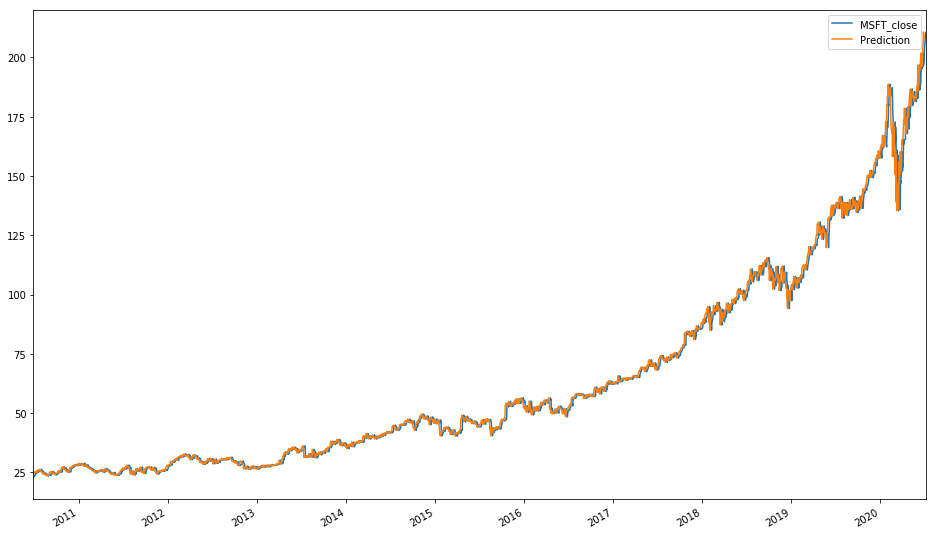

In [144]:
df_MSFT.plot(figsize=(16,10))